In [16]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from random import randint

In [70]:
# extract weights
f = open("model_weights.txt", "r")
output = f.readlines()

weights = []

print(np.array(output[11].split(" ")).astype(np.float32))

for i, a in enumerate(output):
    l = len(a.split(" ")) 
    if l == 1: continue
    print(i, l)
    ws = np.array(a.split(" ")).astype(np.float32)
    weights.append(ws)
    
len(weights)

[-0.28466603  0.21197046 -0.11965785 -0.12151188 -0.04327588  0.19770963
 -0.21109436 -0.09403622 -0.10058617 -0.08626349]
1 50176
3 64
5 2048
7 32
9 320
11 10


6

In [64]:
def ReLU(x): 
    return np.maximum(0, x)

def Linear(x: np.array, w: np.array, bias: np.array):
    return x.dot(w) + bias

def Log_Softmax(x: np.array, axis=1):
    x_off = x - np.max(x, axis=axis, keepdims=True)
    return x_off - np.log(np.sum(np.exp(x_off), axis=axis, keepdims=True))

In [53]:
class mymodel:
    def __init__(self, w):
        self.weights = w # extract from file
        
    def forward(self, x: np.array):
        # nn
        x = x.flatten()
        x = Linear(x, self.weights[0].reshape(784,64), self.weights[1])
        x = ReLU(x)
        x = Linear(x, self.weights[2].reshape(64, 32), self.weights[3])
        x = ReLU(x)
        # classifier
        x = Linear(x, self.weights[4].reshape(32, 10), self.weights[5])
        x = Log_Softmax(x)
        
        return x
    
model = mymodel(weights)

(28, 28)


array([-2.41677  , -2.6511126, -1.9500709, -3.6215496, -2.6558242,
       -3.0556211, -2.7440376, -2.4530096, -2.6042185, -1.1099573],
      dtype=float32)

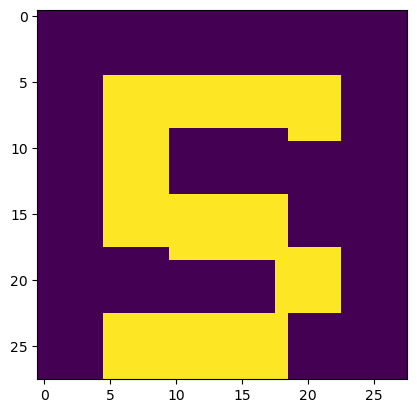

In [74]:
from PIL import Image


lol = np.array([[0,0,0,0,0,0],
               [0,1,1,1,1,0],
               [0,1,0,0,0,0],
               [0,1,1,1,0,0],
               [0,0,0,0,1,0],
               [0,1,1,1,0,0]])
lol = np.array(Image.fromarray(lol.astype(np.uint8)).resize((28, 28))).astype('float32')
plt.imshow(lol)
print(lol.shape)

#print(model.forward(lol)
model.forward(lol)